## **Data Analysis Project-Blinkit Analysis**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Data**

In [3]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\blinkitdata file.csv")

### **Size of Data**

In [4]:
print("Size is :",df.shape)

Size is : (8523, 12)


### **Top 10 Rows**

In [5]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


### **Field Names** 

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types of Fields** 

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning** 

In [8]:
print(df['Item Fat Content'])

0       Regular
1       Low Fat
2       Regular
3       Regular
4       Low Fat
         ...   
8518    low fat
8519    low fat
8520    low fat
8521        reg
8522        reg
Name: Item Fat Content, Length: 8523, dtype: object


In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### **Key Performance Indicators** 

In [12]:
#total_sales
total_sales = df['Sales'].sum()

#Avg_Sales
Avg_Sales = df['Sales'].mean()

#No_of_items
No_of_Items = df['Sales'].count()

#Avg_Rating
Avg_Rating = df['Rating'].mean()

#display
print(f"total_sales : ${total_sales:,.0f}")
print(f"Avg_sales : ${Avg_Sales:,.1f}")
print(f"No_of_items : {No_of_Items}")
print(f"Avg_Rating : {Avg_Rating:,.1f}")

total_sales : $1,201,681
Avg_sales : $141.0
No_of_items : 8523
Avg_Rating : 4.0


## **Charts** 

### **SALES BY FAT CONTENT** 

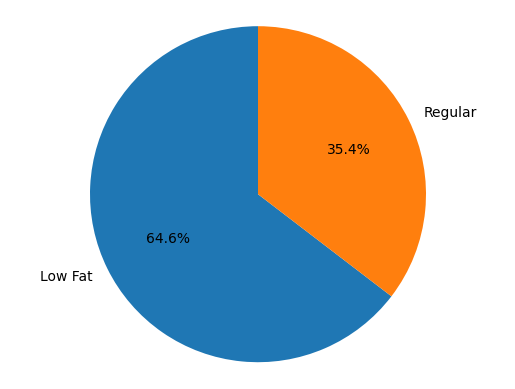

In [13]:
sales_by_fat = df.groupby(['Item Fat Content'])['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,autopct = '%.1f%%',startangle = 90)
plt.axis('equal')
plt.show()

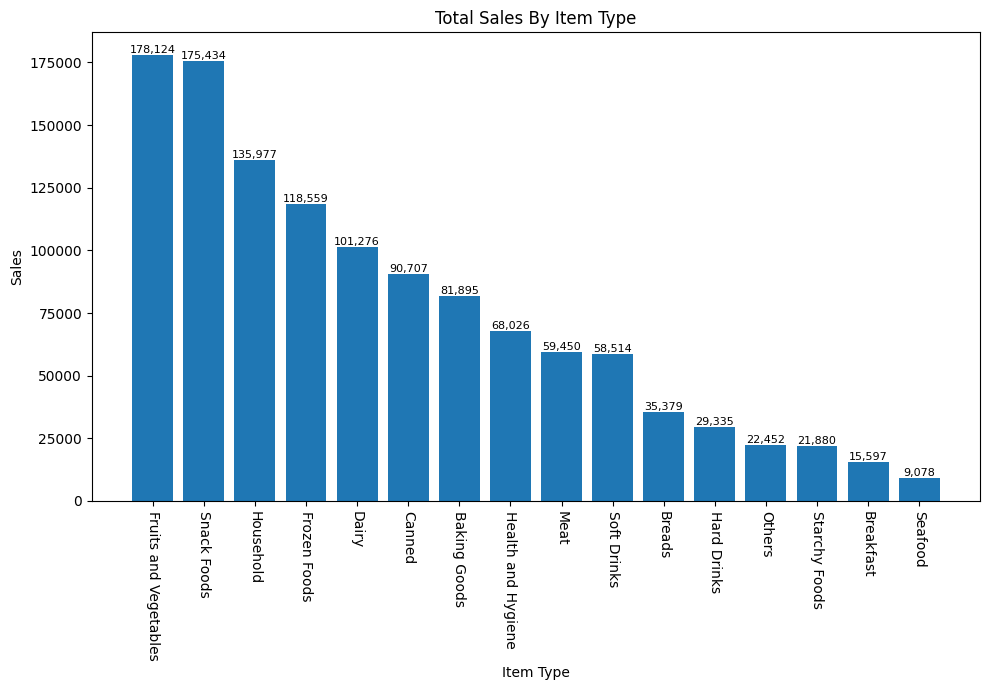

In [14]:
sales_by_item = df.groupby(['Item Type'])['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize = (10,7))
bars = plt.bar(sales_by_item.index,sales_by_item.values)

plt.xticks(rotation = -90)
plt.title('Total Sales By Item Type')

plt.xlabel('Item Type')
plt.ylabel('Sales')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(),
             f"{bar.get_height():,.0f}",ha = 'center',va = 'bottom',fontsize = 8)
plt.tight_layout()
plt.show()

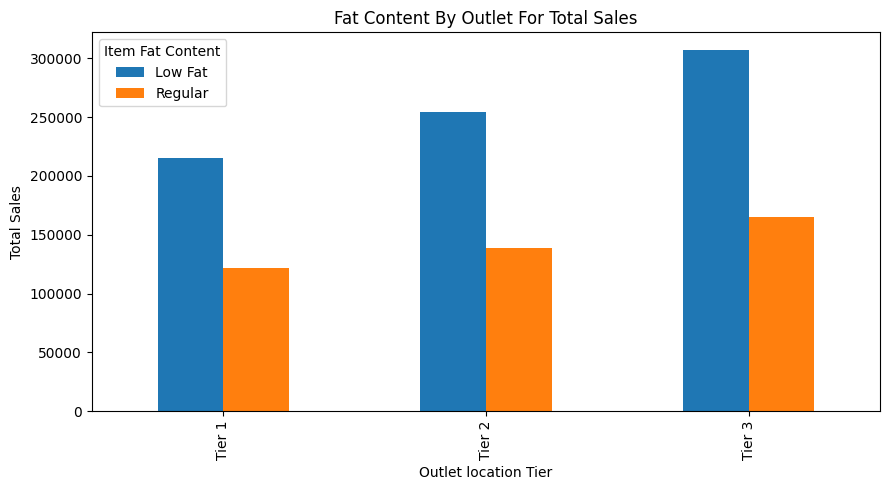

In [15]:
grouping = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouping = grouping[['Low Fat','Regular']]
ax = grouping.plot(kind = 'bar',figsize = (9,5),title = 'Fat Content By Outlet For Total Sales')
plt.legend(title = 'Item Fat Content')
plt.xlabel('Outlet location Tier')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### **TOTAL SALES BY OUTLET ESTABLISHMENT** 

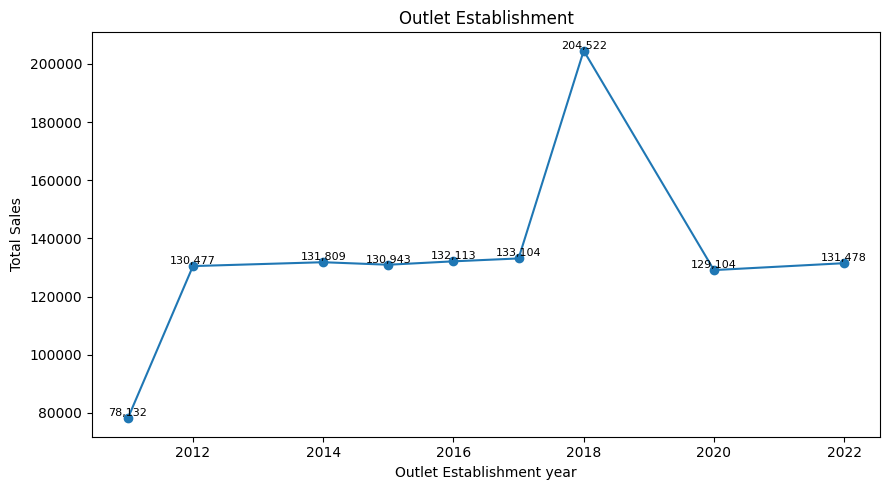

In [16]:
sales_by_year = df.groupby(['Outlet Establishment Year'])['Sales'].sum().sort_index()
plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker = 'o',linestyle = '-')
plt.title('Outlet Establishment')
plt.xlabel('Outlet Establishment year')
plt.ylabel('Total Sales')
for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f"{y:,.0f}",ha = 'center',va = 'bottom',fontsize = 8)
plt.tight_layout()
plt.show()

### **SALES BY OUTLET SIZE** 

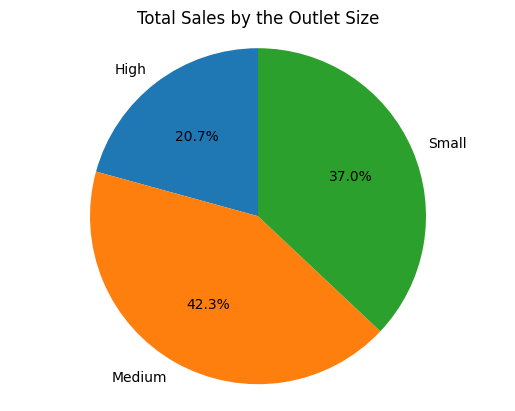

In [17]:
sales_by_outlet = df.groupby(['Outlet Size'])['Sales'].sum()
plt.pie(sales_by_outlet,labels = sales_by_outlet.index,autopct = '%.1f%%',startangle = 90)
plt.title('Total Sales by the Outlet Size')
plt.axis('equal')
plt.show()

### **SALES BY OUTLET LOCATION** 

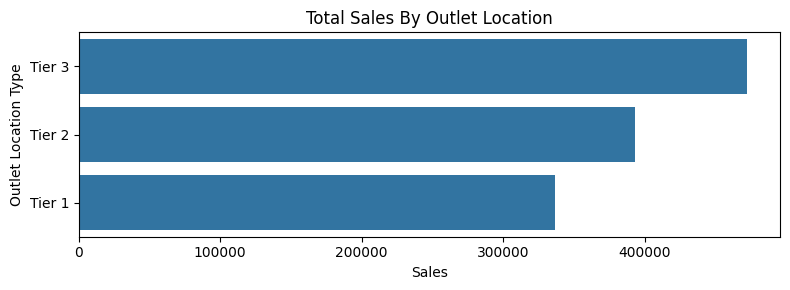

In [18]:
sales_by_location = df.groupby(['Outlet Location Type'])['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by=['Sales'],ascending = False)
plt.figure(figsize=(8,3))
ax = sns.barplot(x = 'Sales',y = 'Outlet Location Type',data = sales_by_location)
plt.title('Total Sales By Outlet Location')
plt.tight_layout()
plt.show()

### **CONCLUSION** 

#### This analysis revealed that medium-sized outlets, low fat content items, and urban locations drive the highest sales for Blinkit.These insights support data-driven decisions in inventory planning, outlet expansion, and customer targeting strategies.

**BY VEDANT**